<a href="https://colab.research.google.com/github/Ashish-09/SHALA_2020/blob/master/SHALA_ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [32]:
attrition_data.tail(30)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
998,26,0,Travel_Rarely,683,Research & Development,2,1,Medical,1,1407,1,Male,36,2,1,Research Scientist,4,Single,3904,4050,0,No,12,3,4,0,5,2,3,4,3,1,1,998
999,42,0,Travel_Rarely,1147,Human Resources,10,3,Human Resources,1,1408,3,Female,31,3,4,Manager,1,Married,16799,16616,0,No,14,3,3,1,21,5,3,20,7,0,9,999
1000,52,0,Travel_Rarely,258,Research & Development,8,4,Other,1,1409,3,Female,54,3,1,Laboratory Technician,1,Married,2950,17363,9,No,13,3,3,0,12,2,1,5,4,0,4,1000
1001,37,0,Travel_Rarely,1462,Research & Development,11,3,Medical,1,1411,1,Female,94,3,1,Laboratory Technician,3,Single,3629,19106,4,No,18,3,1,0,8,6,3,3,2,0,2,1001
1002,35,0,Travel_Frequently,200,Research & Development,18,2,Life Sciences,1,1412,3,Male,60,3,3,Manufacturing Director,4,Single,9362,19944,2,No,11,3,3,0,10,2,3,2,2,2,2,1002
1003,25,0,Travel_Rarely,949,Research & Development,1,3,Technical Degree,1,1415,1,Male,81,3,1,Laboratory Technician,4,Married,3229,4910,4,No,11,3,2,1,7,2,2,3,2,0,2,1003
1004,26,0,Travel_Rarely,652,Research & Development,7,3,Other,1,1417,3,Male,100,4,1,Laboratory Technician,1,Single,3578,23577,0,No,12,3,4,0,8,2,3,7,7,0,7,1004
1005,29,0,Travel_Rarely,332,Human Resources,17,3,Other,1,1419,2,Male,51,2,3,Human Resources,1,Single,7988,9769,1,No,13,3,1,0,10,3,2,10,9,0,9,1005
1006,49,1,Travel_Frequently,1475,Research & Development,28,2,Life Sciences,1,1420,1,Male,97,2,2,Laboratory Technician,1,Single,4284,22710,3,No,20,4,1,0,20,2,3,4,3,1,3,1006
1007,29,1,Travel_Frequently,337,Research & Development,14,1,Other,1,1421,3,Female,84,3,3,Healthcare Representative,4,Single,7553,22930,0,Yes,12,3,1,0,9,1,3,8,7,7,7,1007


In [5]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

In [9]:
attrition_data.shape

(1028, 34)

In [10]:
# getting a count of unavailable values
attrition_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

In [11]:
# check of missing values(a)
attrition_data.isnull().values.any()


False

In [12]:
# STATISTICS
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [13]:
attrition_data['Attrition'].value_counts()

0    856
1    172
Name: Attrition, dtype: int64

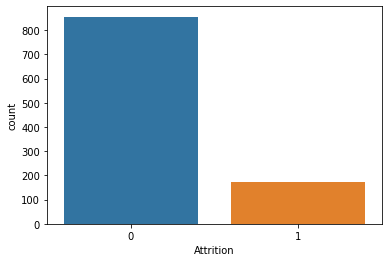

In [14]:
#visualisation
sns.countplot(attrition_data['Attrition'])

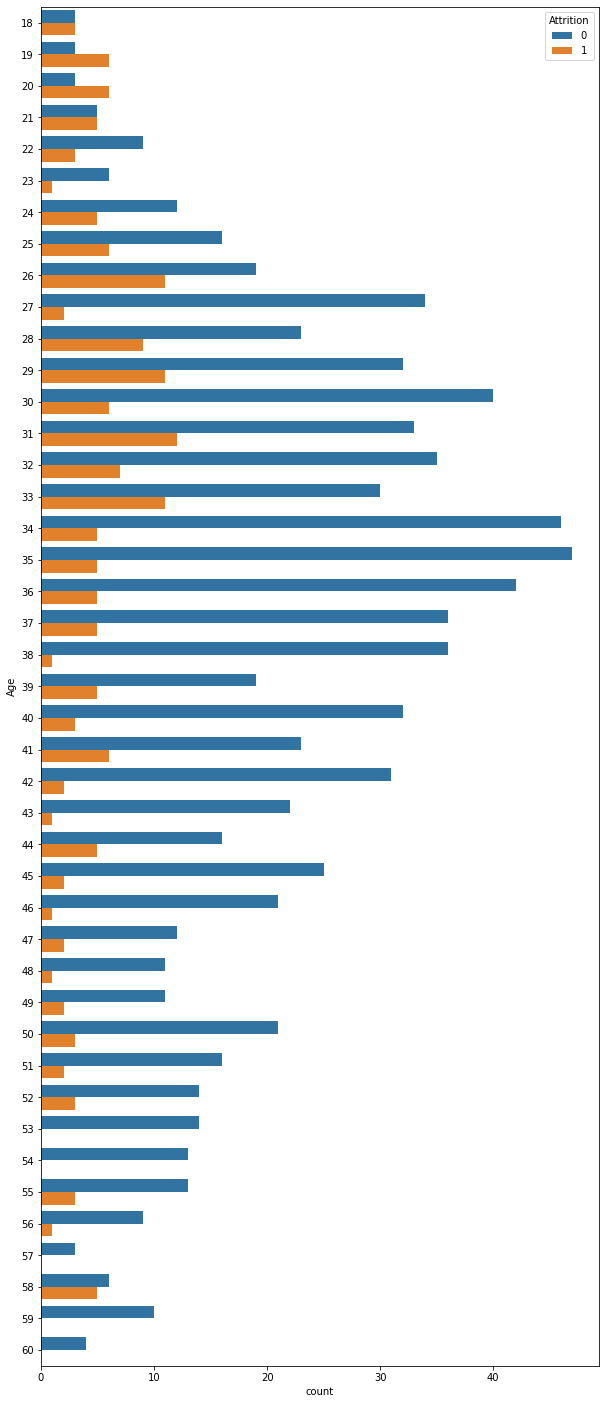

In [21]:
  plt.figure(figsize = (10,25))
  sns.countplot(y = 'Age', hue = 'Attrition',data = attrition_data)

In [17]:
for column in attrition_data.columns:
  if attrition_data[column].dtype == object :
    print(str(column) + '  :  ' + str(attrition_data[column].unique())) 
    print(attrition_data[column].value_counts())  
    print ('*******************************************************************************')

BusinessTravel  :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64
*******************************************************************************
Department  :  ['Sales' 'Research & Development' 'Human Resources']
Research & Development    683
Sales                     309
Human Resources            36
Name: Department, dtype: int64
*******************************************************************************
EducationField  :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       427
Medical             320
Marketing           119
Technical Degree     90
Other                57
Human Resources      15
Name: EducationField, dtype: int64
*******************************************************************************
Gender  :  ['Female' 'Male']
Male      597
Female    431
Name: Gender, dtype: int64
***********************

In [27]:
attrition_data.groupby(['Gender'])['Attrition'].value_counts(normalize = True)

Gender  Attrition
Female  0            0.844548
        1            0.155452
Male    0            0.824121
        1            0.175879
Name: Attrition, dtype: float64

In [28]:
attrition_data.groupby(['Department'])['Attrition'].value_counts(normalize = True)

Department              Attrition
Human Resources         0            0.861111
                        1            0.138889
Research & Development  0            0.847731
                        1            0.152269
Sales                   0            0.796117
                        1            0.203883
Name: Attrition, dtype: float64

In [35]:
attrition_data.groupby(['JobRole'])['Attrition'].value_counts(normalize = True)

JobRole                    Attrition
Healthcare Representative  0            0.905882
                           1            0.094118
Human Resources            0            0.821429
                           1            0.178571
Laboratory Technician      0            0.743169
                           1            0.256831
Manager                    0            0.936709
                           1            0.063291
Manufacturing Director     0            0.942857
                           1            0.057143
Research Director          0            0.966102
                           1            0.033898
Research Scientist         0            0.818182
                           1            0.181818
Sales Executive            0            0.834081
                           1            0.165919
Sales Representative       0            0.578947
                           1            0.421053
Name: Attrition, dtype: float64

In [41]:
attrition_data.groupby(['BusinessTravel'])['Attrition'].value_counts(normalize = True)

BusinessTravel     Attrition
Non-Travel         0            0.901961
                   1            0.098039
Travel_Frequently  0            0.761421
                   1            0.238579
Travel_Rarely      0            0.842250
                   1            0.157750
Name: Attrition, dtype: float64

In [40]:
attrition_data['EmployeeCount'].unique()

array([1])

Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64


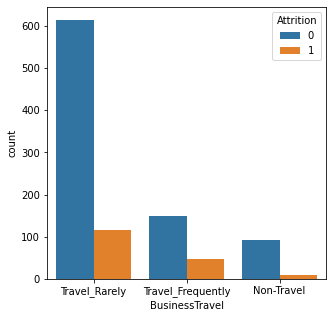

Research & Development    683
Sales                     309
Human Resources            36
Name: Department, dtype: int64


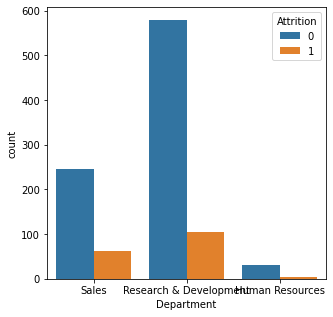

Life Sciences       427
Medical             320
Marketing           119
Technical Degree     90
Other                57
Human Resources      15
Name: EducationField, dtype: int64


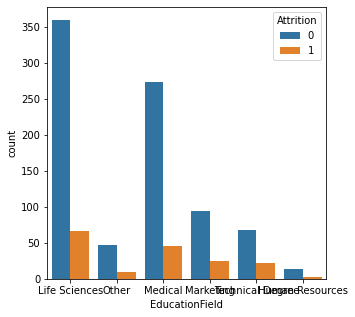

Male      597
Female    431
Name: Gender, dtype: int64


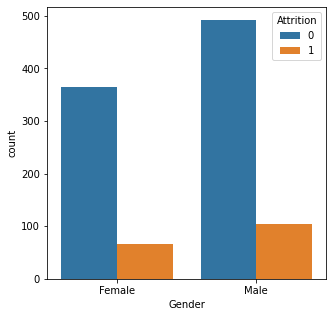

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


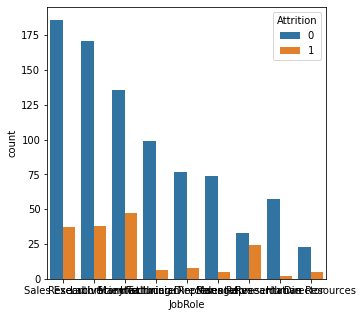

Married     454
Single      342
Divorced    232
Name: MaritalStatus, dtype: int64


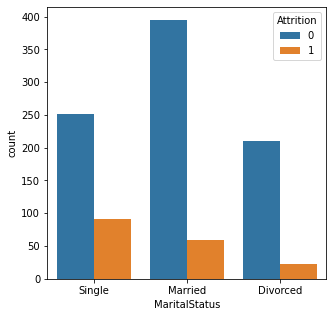

No     726
Yes    302
Name: OverTime, dtype: int64


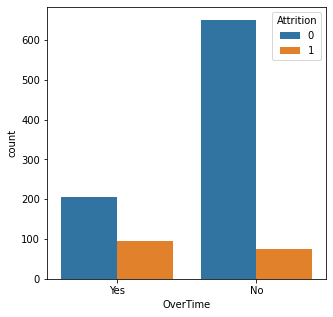

In [69]:
data_not_num = attrition_data.select_dtypes(['object'])
for item in data_not_num.columns.to_list():
  print(data_not_num[item].value_counts())
  plt.figure(figsize = (5,5))
  sns.countplot(data_not_num[item], hue = attrition_data['Attrition'])
  plt.show()


# Removing some data that seem to be less relevant to attrition

In [0]:
data = attrition_data.drop('ID', axis = 1)
data = data.drop('EmployeeCount', axis = 1)
data = data.drop('EmployeeNumber', axis = 1)


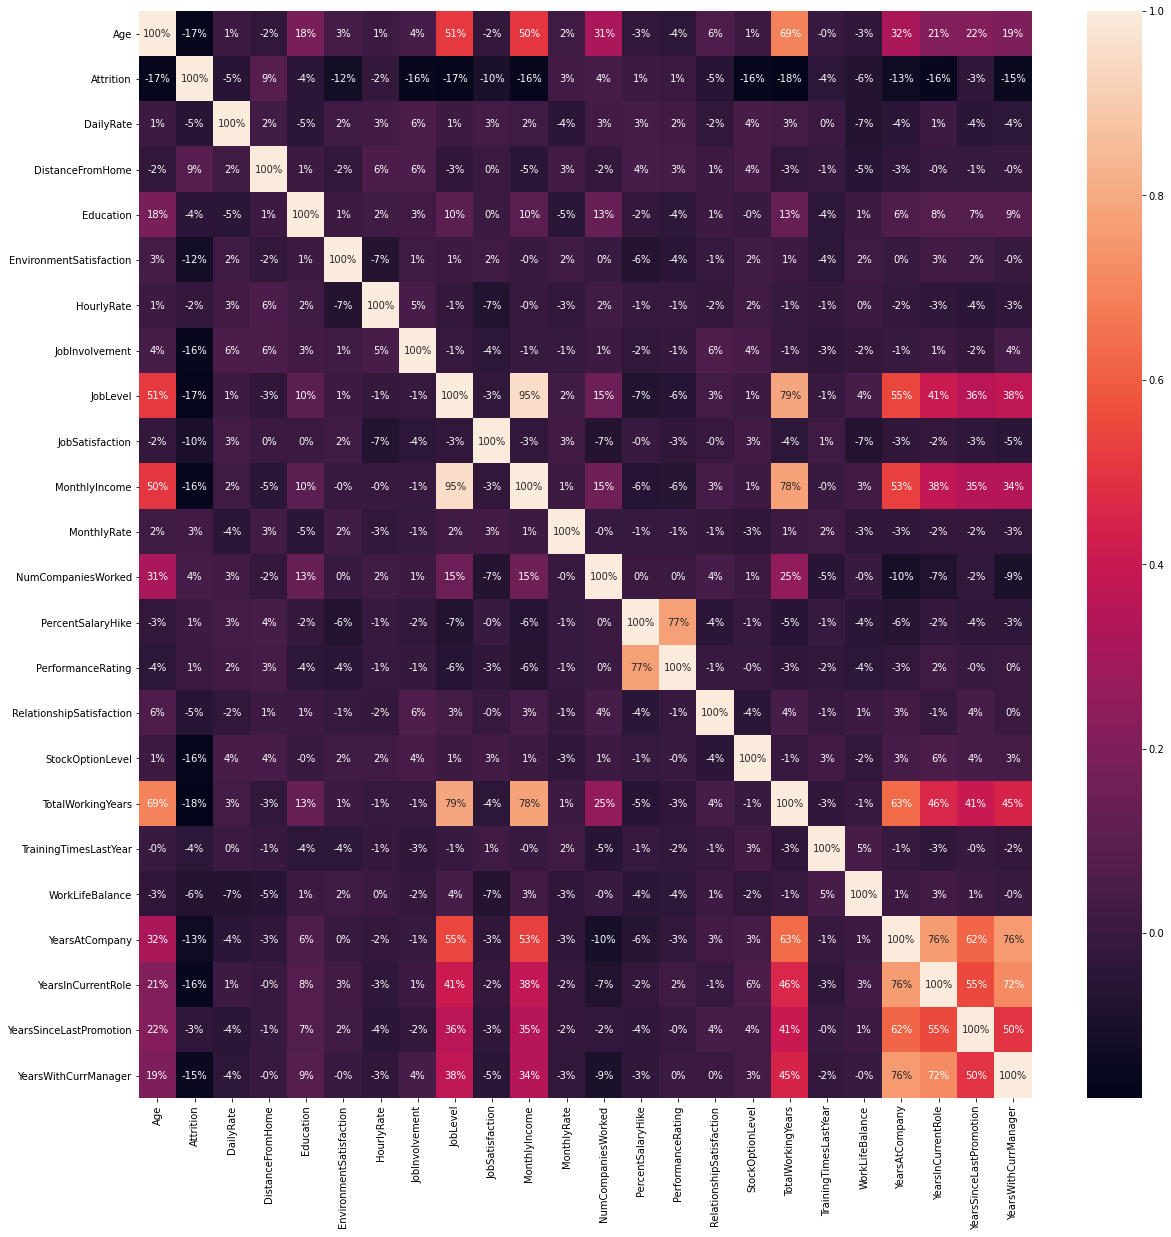

In [177]:
correlation = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot = True, fmt = '.0%' )

### Converting the non numeric to numeric data

In [178]:
data['Gender'].replace(to_replace = ['Male','Female'], value = [0,1], inplace = True )
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,1,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,0,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,0,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,1,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,0,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [179]:
data['OverTime'].replace(to_replace = ['Yes','No'], value = [0,1], inplace = True )
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,1,94,3,2,Sales Executive,4,Single,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,0,61,2,2,Research Scientist,2,Married,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,0,92,2,1,Laboratory Technician,3,Single,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,1,56,3,1,Research Scientist,3,Married,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,0,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2


In [180]:
data_not_num = data.select_dtypes(['object'])
data_not_num.head()



,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


ONe hot Encoding

In [181]:
not_num_columns = list(data_not_num.columns)
data_not_num = pd.get_dummies(data_not_num, prefix_sep ='--',columns = not_num_columns)

data_not_num.head()


,BusinessTravel--Non-Travel,BusinessTravel--Travel_Frequently,BusinessTravel--Travel_Rarely,Department--Human Resources,Department--Research & Development,Department--Sales,EducationField--Human Resources,EducationField--Life Sciences,EducationField--Marketing,EducationField--Medical,EducationField--Other,EducationField--Technical Degree,JobRole--Healthcare Representative,JobRole--Human Resources,JobRole--Laboratory Technician,JobRole--Manager,JobRole--Manufacturing Director,JobRole--Research Director,JobRole--Research Scientist,JobRole--Sales Executive,JobRole--Sales Representative,MaritalStatus--Divorced,MaritalStatus--Married,MaritalStatus--Single
0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [182]:
#separating the numeric data only
data_num = data.select_dtypes(['int64'])
data_num.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,0,61,2,2,2,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,1,56,3,1,3,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,0,40,3,1,2,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2


In [183]:
df = pd.concat([data_num,data_not_num], axis = 1)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel--Non-Travel,BusinessTravel--Travel_Frequently,BusinessTravel--Travel_Rarely,Department--Human Resources,Department--Research & Development,Department--Sales,EducationField--Human Resources,EducationField--Life Sciences,EducationField--Marketing,EducationField--Medical,EducationField--Other,EducationField--Technical Degree,JobRole--Healthcare Representative,JobRole--Human Resources,JobRole--Laboratory Technician,JobRole--Manager,JobRole--Manufacturing Director,JobRole--Research Director,JobRole--Research Scientist,JobRole--Sales Executive,JobRole--Sales Representative,MaritalStatus--Divorced,MaritalStatus--Married,MaritalStatus--Single
0,41,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,0,61,2,2,2,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,1,56,3,1,3,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,0,40,3,1,2,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [184]:
#creating a new col
df['_Age'] = df['Age']
df = df.drop(['Age'], axis = 1)
df.head()

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel--Non-Travel,BusinessTravel--Travel_Frequently,BusinessTravel--Travel_Rarely,Department--Human Resources,Department--Research & Development,Department--Sales,EducationField--Human Resources,EducationField--Life Sciences,EducationField--Marketing,EducationField--Medical,EducationField--Other,EducationField--Technical Degree,JobRole--Healthcare Representative,JobRole--Human Resources,JobRole--Laboratory Technician,JobRole--Manager,JobRole--Manufacturing Director,JobRole--Research Director,JobRole--Research Scientist,JobRole--Sales Executive,JobRole--Sales Representative,MaritalStatus--Divorced,MaritalStatus--Married,MaritalStatus--Single,_Age
0,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,41
1,0,279,8,1,3,0,61,2,2,2,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,49
2,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,37
3,0,1392,3,4,4,1,56,3,1,3,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,33
4,0,591,2,1,1,0,40,3,1,2,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,27


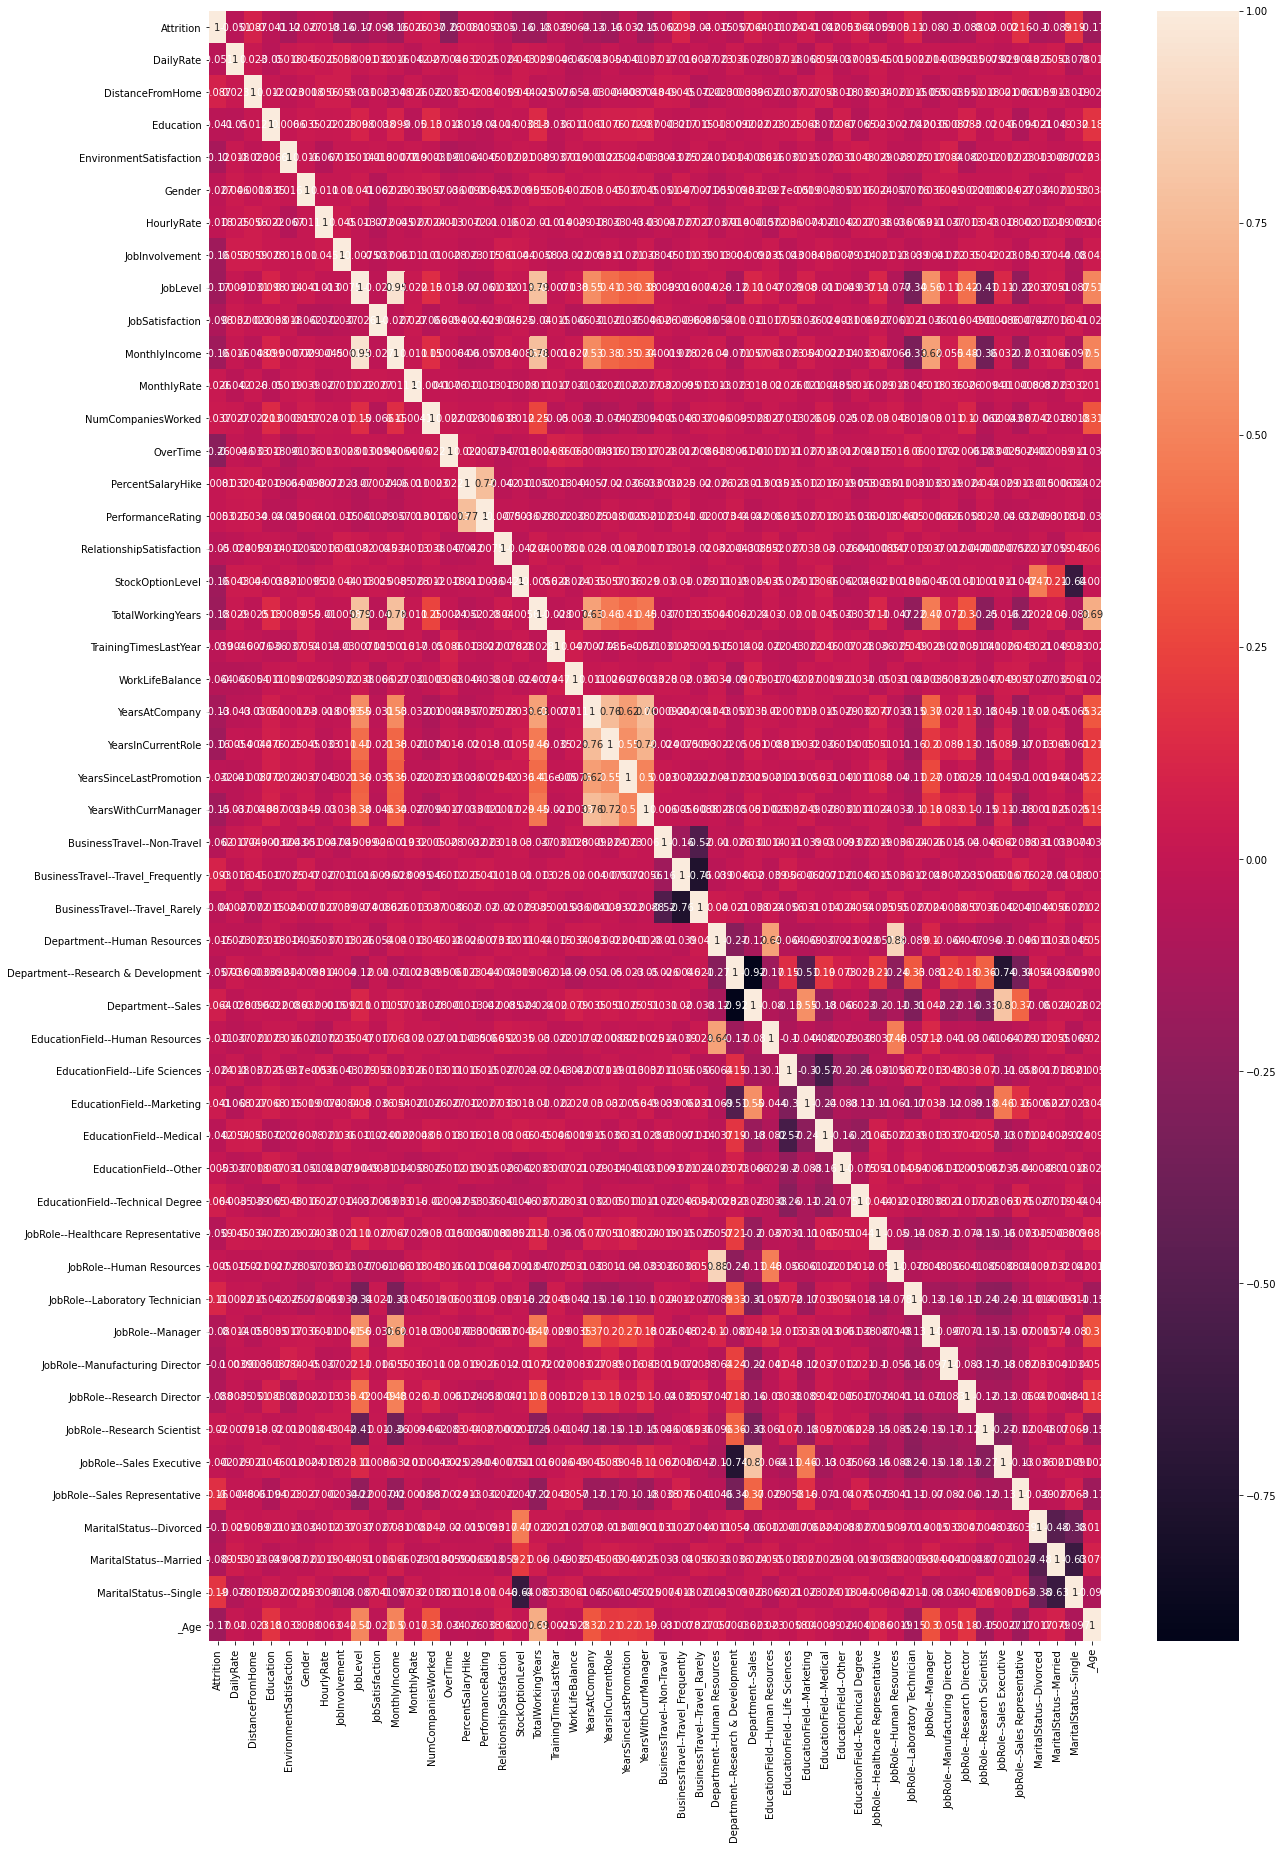

In [185]:
plt.figure(figsize = (20,30))
sns.heatmap(df.corr(), annot = True)
plt.show()

Splitting the Data


In [0]:
X = df.iloc[:,1:df.shape[1]].values
Y = df.iloc[:, 0].values


In [0]:
# normalising the data
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)


Correlation

In [188]:
data_corr = abs(df.corr()['Attrition'])
print(data_corr.sort_values(ascending=False))

Attrition                             1.000000
OverTime                              0.260167
MaritalStatus--Single                 0.186833
TotalWorkingYears                     0.178842
JobLevel                              0.169121
_Age                                  0.168641
JobRole--Sales Representative         0.164704
MonthlyIncome                         0.163709
StockOptionLevel                      0.160597
YearsInCurrentRole                    0.159691
JobInvolvement                        0.158768
YearsWithCurrManager                  0.151208
YearsAtCompany                        0.133021
EnvironmentSatisfaction               0.119202
JobRole--Laboratory Technician        0.111606
MaritalStatus--Divorced               0.104844
JobRole--Manufacturing Director       0.099554
JobSatisfaction                       0.097518
BusinessTravel--Travel_Frequently     0.092959
MaritalStatus--Married                0.089015
JobRole--Research Director            0.088200
DistanceFromH

Splitting the Data

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.20, random_state  = 1)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(822, 49) (822,) (206, 49) (206,)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix


 Classification

In [0]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1 )
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
xgb = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
clf = [rfc, lr, knn, dtc, xgb]

In [0]:
from sklearn.metrics import jaccard_similarity_score as jac
from sklearn.metrics import f1_score 
from sklearn.metrics import log_loss  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import itertools


In [0]:
def plot_cnf(cm,classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalised Confusion Matrix')
  else:
    print('NOT Normalised Confusion Matrix')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
            



NOT Normalised Confusion Matrix
[[177   3]
 [ 17   9]]
The Accuracy Score :   0.9029126213592233
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       180
           1       0.75      0.35      0.47        26

    accuracy                           0.90       206
   macro avg       0.83      0.66      0.71       206
weighted avg       0.89      0.90      0.89       206

********************
NOT Normalised Confusion Matrix
[[171   9]
 [ 13  13]]
The Accuracy Score :   0.8932038834951457
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       180
           1       0.59      0.50      0.54        26

    accuracy                           0.89       206
   macro avg       0.76      0.72      0.74       206
weighted avg       0.89      0.89      0.89       206

********************
NOT Normalised Confusion Matrix
[[179   1]
 [ 24   2]]
The Accuracy Score :   0.8786407766990292
             

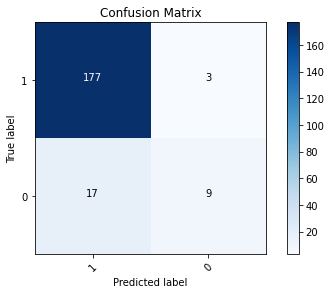

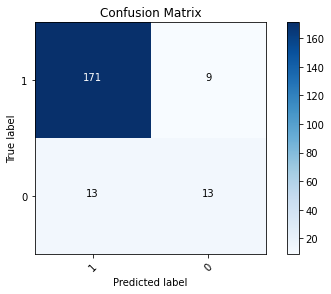

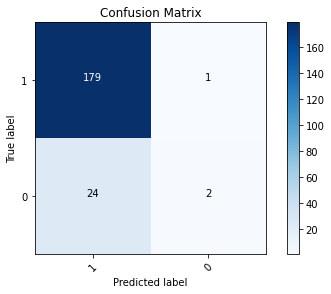

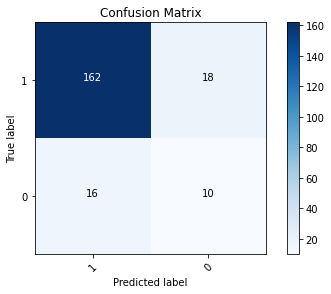

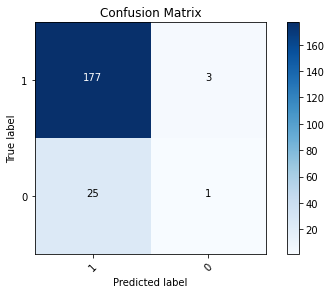

In [234]:
for method in clf :

  method.fit(X_train,Y_train)
  Y_pred = method.predict(X_test)

  cnf_matrix = confusion_matrix(Y_test, Y_pred)
  np.set_printoptions(precision=2)
  plt.figure()
  plot_cnf(cnf_matrix, classes = df["Attrition"].unique().tolist(), normalize = False, title = "Confusion Matrix")
  
  
  print('The Accuracy Score :  ', accuracy_score(Y_test, Y_pred))
  cr = classification_report(Y_test, Y_pred)
  print(cr)
  print('********************')